# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
%pip install matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

### Critique

The chart effectively uses percentages to communicated the distribution of the levels of concern among viewers, simplifying the general sentiment for the audience. The use of colored bars with different heights is also a clear and intiutive design choice. However, the chart has significant issues. For example, the bar representing 13% ("NOT AT ALL") is depicted as much taller than the bar representing 28% ("SOMEWHAT"). This distorts the data and misleads the viewers about the actual distribution of the reponses.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

### Critique

The visual aesthetics brought out by the pie chart is pleasing with clean labels and the shades of blue give a professional appearance. However, the pie chart has several flaws. One flaw is that the use of a 3D design distorts the relative sizes of the slices, making it hard for viewers to accurately compare the sectors. Another flaws is that the pie chart includes many categories with almost equal percentages making it hard to distinguish the slices. For example,, the difference between "Education" (9.4%) and "Property" (9.6%) is almost imperceptible, yet these differences could be important depending on the context.

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

### Critique

The Y-axis is inverted. This distorts the data distribution, this makes the viewer assume that 721 is a lesser value than 721. This unconventional design makes it harder for viewers who are accustomed to reading the graphs where the higher values are represented by taller points or heights.

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [3]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [4]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk']
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight',
                              'educ':'education',
                              'coninc':'income',
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige',
                              'papres10':'father_job_prestige',
                              'sei10':'socioeconomic_index',
                              'fechld':'relationship',
                              'fefam':'male_breadwinner',
                              'fehire':'hire_women',
                              'fejobaff':'preference_hire_women',
                              'fepol':'men_bettersuited',
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

In [ ]:
print(gss_clean.columns)
print(gss_clean)

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times:
* once using `matplotlib` alone,
* once using `seaborn`,
* and once using the `.plot()` method from `pandas`.

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [6]:
# column to category type
gss_clean['relationship'] = gss_clean['relationship'].astype('category')

# reorder categories
gss_clean['relationship'] = gss_clean['relationship'].cat.reorder_categories(['strongly agree', 'agree', 'disagree', 'strongly disagree'], ordered=True)


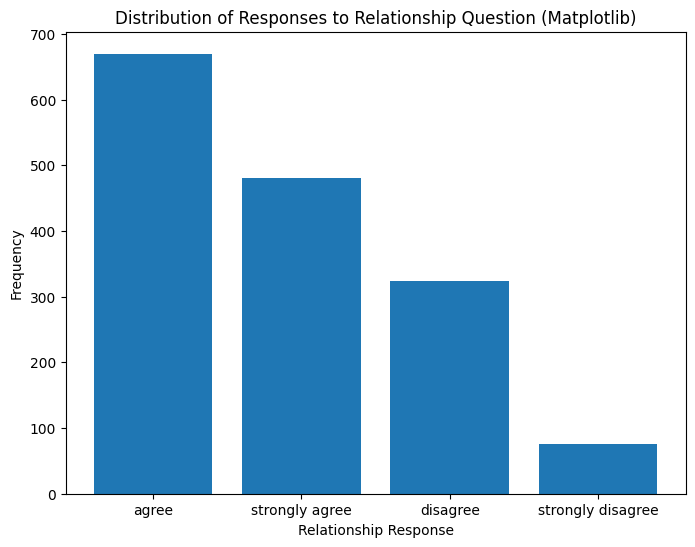

In [8]:
# Bar plot using matplotlib alone
# count frequencies
relationship_counts = gss_clean['relationship'].value_counts()

# plot bar chart using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(relationship_counts.index, relationship_counts.values)
plt.xlabel('Relationship Response')
plt.ylabel('Frequency')
plt.title('Distribution of Responses to Relationship Question (Matplotlib)')
plt.show()


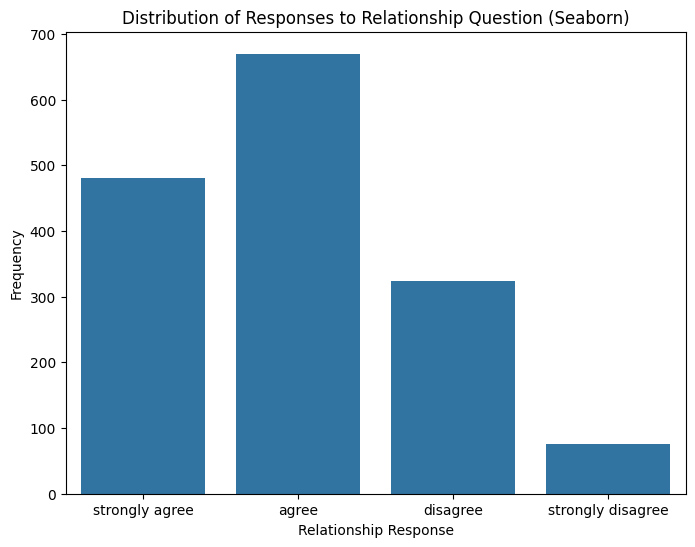

In [9]:
# Bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='relationship', data=gss_clean, order=['strongly agree', 'agree', 'disagree', 'strongly disagree'])
plt.xlabel('Relationship Response')
plt.ylabel('Frequency')
plt.title('Distribution of Responses to Relationship Question (Seaborn)')
plt.show()


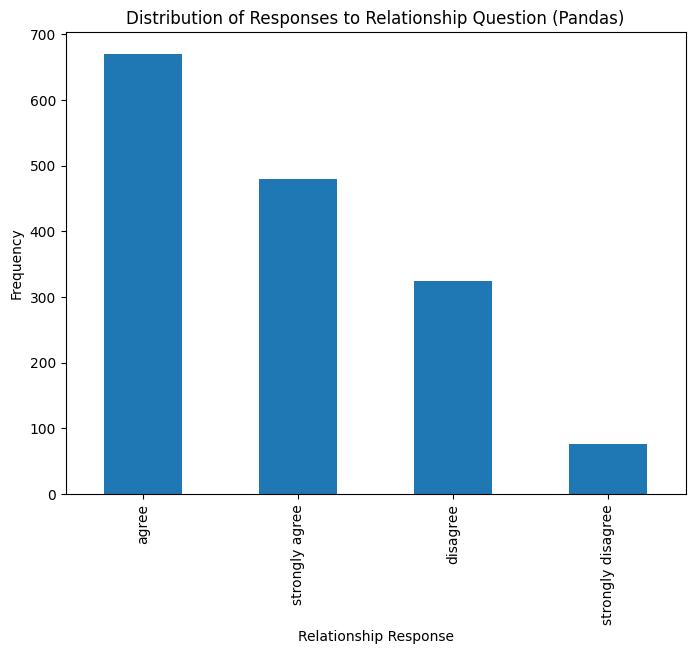

In [10]:
# prompt: Then create a simple barplot that shows the frequencies of the categories of relationship using the .plot() method from pandas

# Bar plot using pandas .plot()
plt.figure(figsize=(8, 6))
gss_clean['relationship'].value_counts().plot(kind='bar')
plt.xlabel('Relationship Response')
plt.ylabel('Frequency')
plt.title('Distribution of Responses to Relationship Question (Pandas)')
plt.show()


### Part b
Create two barplots that show
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot,
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

<ipython-input-11-9c61a0ea8229>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = gss_clean.groupby(['sex', 'relationship'])['id'].count().reset_index(name='count')


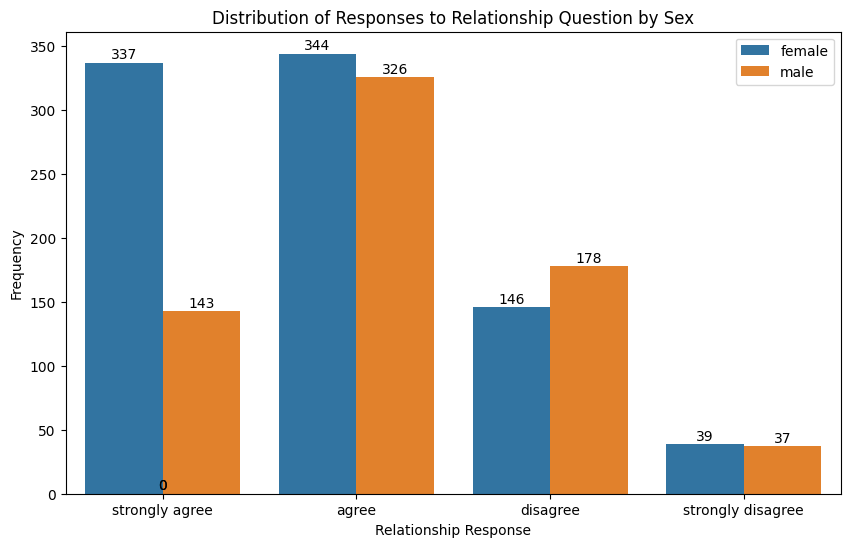

In [11]:
# Group the data by sex and relationship
grouped = gss_clean.groupby(['sex', 'relationship'])['id'].count().reset_index(name='count')

# Plot the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='relationship', y='count', hue='sex', data=grouped,
                 order=['strongly agree', 'agree', 'disagree', 'strongly disagree'])

# Label each bar with its count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center")

# Add labels and title
plt.xlabel('Relationship Response')
plt.ylabel('Frequency')
plt.title('Distribution of Responses to Relationship Question by Sex')

# Show the plot
plt.legend()
plt.show()

<ipython-input-12-5da27367faac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = gss_clean.groupby(['sex', 'relationship'])['id'].count().unstack()


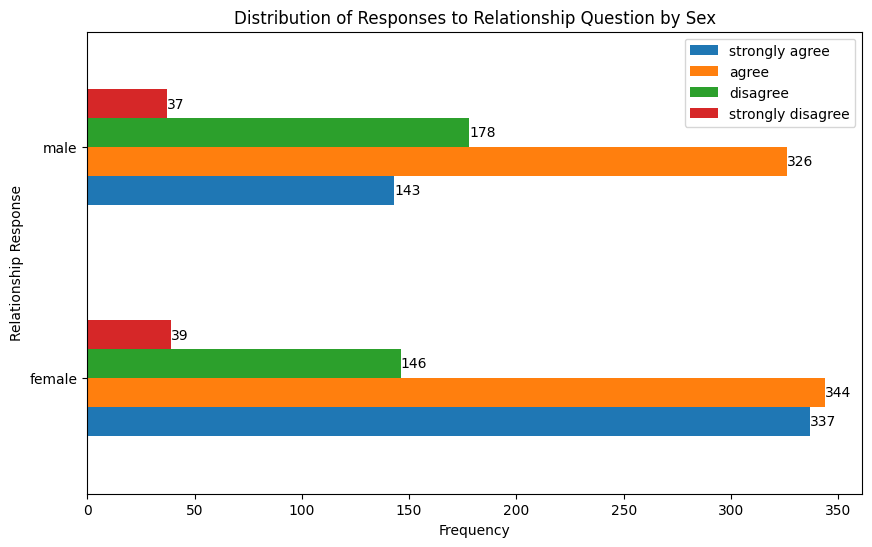

In [12]:
# Group the data by sex and relationship
grouped = gss_clean.groupby(['sex', 'relationship'])['id'].count().unstack()

# Plot the horizontal barplot
ax = grouped.plot(kind='barh', figsize=(10, 6))

# Label each bar with its count
for container in ax.containers:
    ax.bar_label(container)

# Add labels and title
plt.ylabel('Relationship Response')
plt.xlabel('Frequency')
plt.title('Distribution of Responses to Relationship Question by Sex')

# Show the plot
plt.legend()
plt.show()

### Part c
Create a visualization with
* nine barplots, arranged in a 3x3 grid.
* The barplots should refer to each of the nine categories of `region`,
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

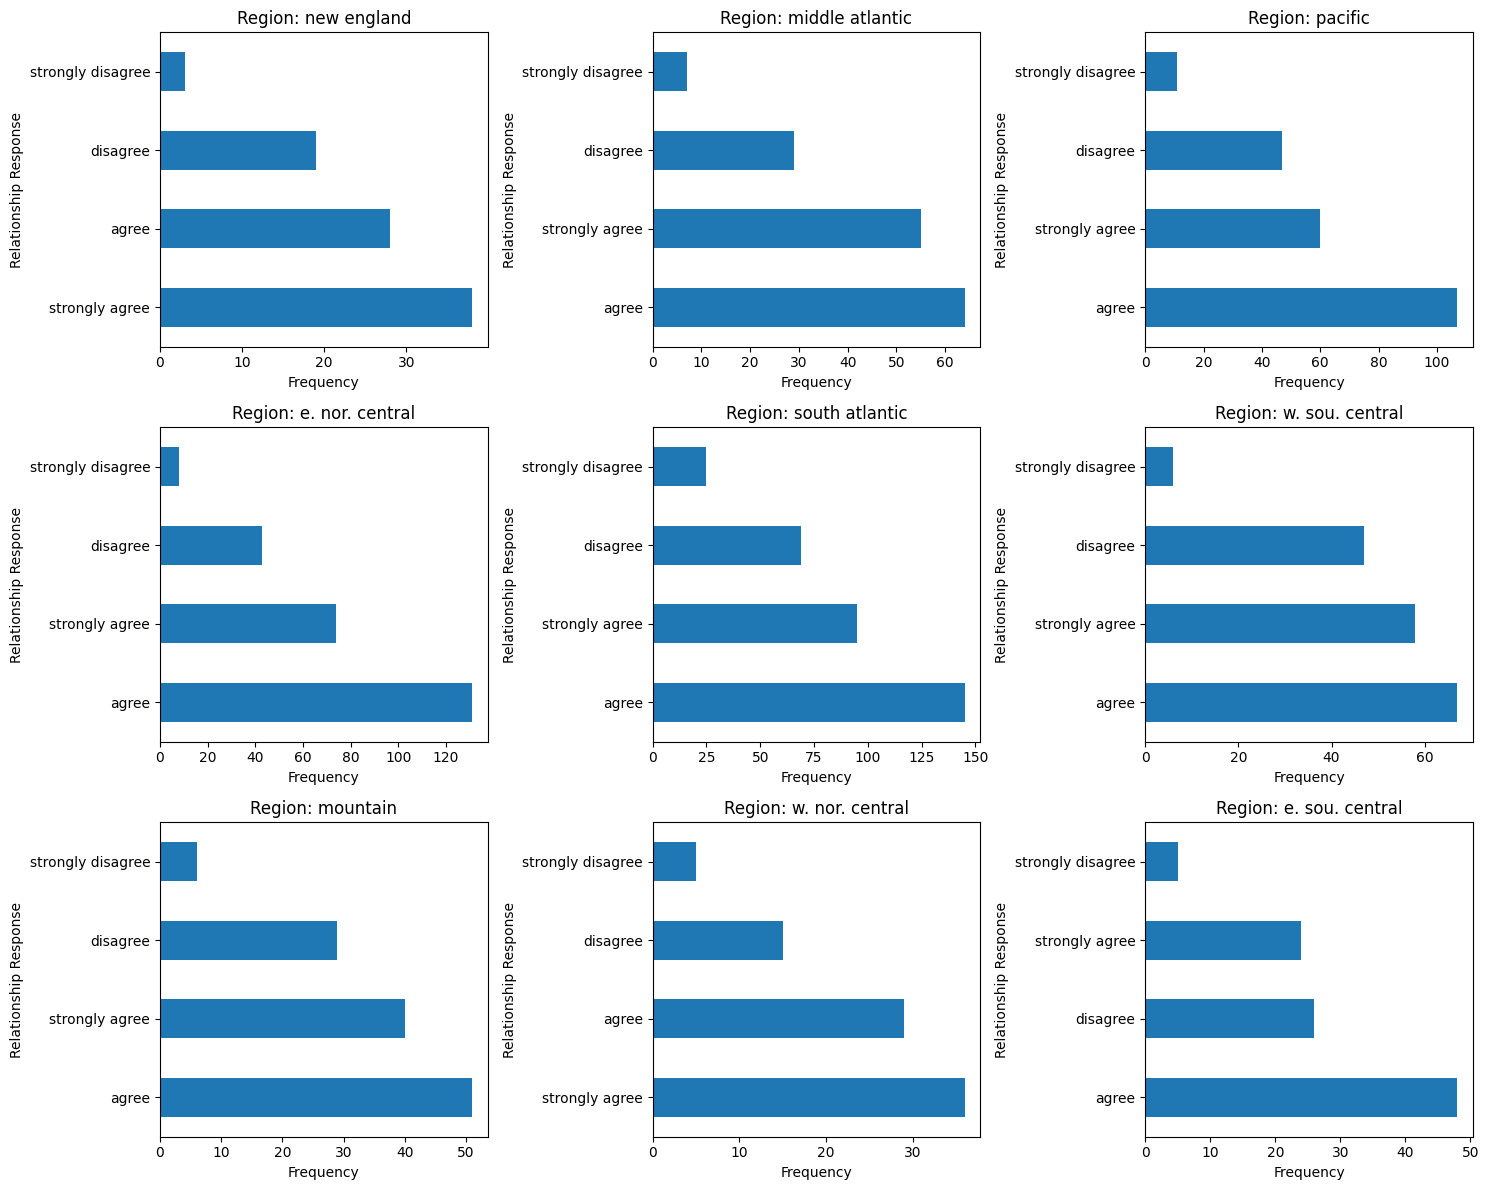

In [13]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Iterate over regions and create barplots
for i, region in enumerate(gss_clean['region'].unique()):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Filter data for the current region
    region_data = gss_clean[gss_clean['region'] == region]

    # Count relationship responses for the region
    relationship_counts = region_data['relationship'].value_counts()

    # Plot horizontal barplot
    relationship_counts.plot(kind='barh', ax=ax)

    # Set title and labels
    ax.set_title(f'Region: {region}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Relationship Response')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`.

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]